# Scikit-Image: Introduction to Image Processing with Python  
* **Course**: ARTIFICIAL INTELLIGENCE
* **Professors**: Ramon Mateo Navarro & Edison Jair Bejarano Sepulveda

There are various image processing libraries in the Python ecosystem. Some of the most popular ones include OpenCV (Open Source Computer Vision), Scikit-Image, and PIL (Python Imaging Library).

---

**Scikit-Image** (known as `skimage`) is a community-driven image library built on `scipy.ndimage` and provides different functions for various image processing tasks in Python.



# Importing skimage

skimage is available by default in Colab notebooks. Therefore the library can be invoked directly using the *import* statement

If you don't have installed you can install using pip: `pip install -U scikit-image`

In [4]:
import skimage
import numpy as np
print(skimage.__version__)

0.24.0


# Common Submodules

Most routines (functions) are grouped under different submodules of `skimage`.

The standard test images are part of the **data** submodule. These images can be accessed directly through function calls.


In [5]:
from skimage import data
camera_image = data.camera()

# What is an Image?

An image is nothing more than an **n-dimensional array** of numbers. Each element of the array corresponds to a **pixel**. The row (r) and column (c) correspond to the **size of the image**, and each r x c plane corresponds to an **image channel**.

Most images are used as:

* **Grayscale images:** A 2D image (r x c) where each pixel corresponds to intensity.
* **Color images (RGB Images):** 2D multi-channel images where the channels correspond to the red, green, and blue channels.


# Image Properties

As mentioned earlier, images are stored as numpy arrays in `skimage`. All possible numpy operations can be applied to image data.

**Exercise #01:**

* Print the type of the previously loaded sample image
* Print the shape and size of the image
* Print the number of channels in the loaded image



In [31]:
# solution

print("Tipo de imagen:", type(camera_image))

print("Forma de la imagen:", camera_image.shape)
print("Tamaño de la imagen:", camera_image.size)

num_channels = camera_image.shape[2] if len(camera_image.shape) == 3 else 1
print("Número de canales en la imagen:", num_channels)


Tipo de imagen: <class 'numpy.ndarray'>
Forma de la imagen: (512, 512)
Tamaño de la imagen: 262144
Número de canales en la imagen: 1


# Image Visualization

The visualization of manipulated images is an important part of any image processing tool. `skimage` provides essential visualization through various tools available in the Python ecosystem.

For all experiments in this course, we will use the functions provided by the **Matplotlib** library.

Read the **[usage](https://matplotlib.org/stable/tutorials/introductory/usage.html)** to get an introduction to the various functions in Matplotlib.

Familiarize yourself with plots, subplots, setting titles, legends, labels, etc. Also, explore common charts that can be used to understand different problems.


In [9]:
import matplotlib.pyplot as plt


Images are visualized using the **imshow** function available in the `pyplot` submodule.

**Exercise #02:**

* Display the camera image using **imshow**
* Change the axis title of the plot to "camera"




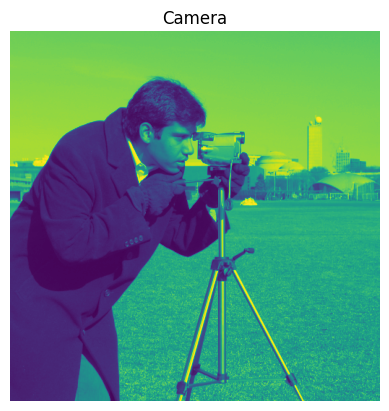

In [10]:
# solution
plt.imshow(camera_image)

plt.title("Camera")
plt.axis('off') 
plt.show()

**Exercise #03:**

* Understand the parameters of `imshow` from `pyplot`
* Display the loaded image as a grayscale image




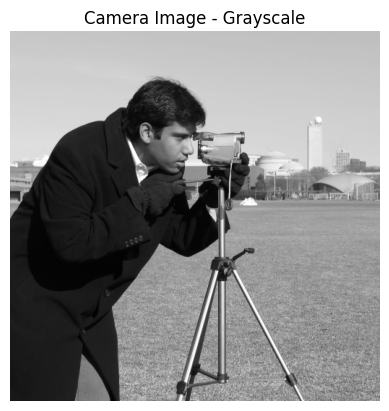

In [33]:
# solution
plt.imshow(camera_image, cmap='gray')

plt.title("Camera Image - Grayscale")
plt.axis('off')  
plt.show()

# Reading and Displaying Images

It is also possible to load images from external sources and save manipulated images in different formats. All supported functions are available in the **io** submodule.


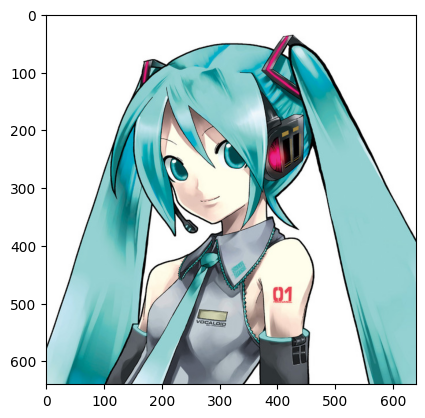

In [12]:
from skimage import io
test_image = io.imread('miku.jpg') 
plt.imshow(test_image)

Similarly, images can be saved in different formats using the `imsave` function.

**Exercise #04: Create a Custom Image Step by Step**

Follow the steps below to create a custom image using NumPy arrays and the Matplotlib library.

1. **Step 1:** Create a black image  
   Use NumPy to create a 256x256x3 array filled with zeros to represent a completely black image.

2. **Step 2:** Create a white image  
   Use `np.full` to create another 256x256x3 array, but this time filled with the value 128 to represent a mid-tone gray image (in this case, used as "white").

3. **Step 3:** Modify the corners  
   Change the top-left corner (64x64 pixels) to be completely black and the bottom-right corner (64x64 pixels) to be completely white.

4. **Step 4:** Add custom colors to other corners  
   Modify the top-right corner to be a mix of red and purple (`[256, 0, 128]`) and the bottom-left corner to be green (`[0, 256, 0]`).

5. **Step 5:** Draw a blue cross in the middle  
   Insert a vertical blue line along the middle of the image (columns 126 to 132) and a horizontal blue line (rows 126 to 132).

6. **Step 6:** Visualize the image  
   Use `plt.imshow` to display the final image.

Your code should result in a visual representation that resembles a white background with custom-colored corners and a blue cross in the center.

7. **Step 7:** Save the image  

   Use `plt.imsave` to save the image on your directory

**Hint:** Use indexing to modify specific regions of the image array.



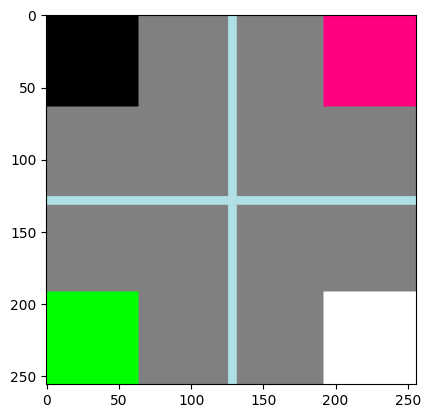

In [15]:
# solution
# paso 1
img = np.zeros([256, 256, 3],dtype=np.uint8)
# paso 2
img = np.full([256, 256, 3], 128,dtype=np.uint8)
# paso 3
img[0:64,0:64] = 0#top left
img[192:256,192:256] = [255, 255, 255] #bottom right

# paso 4
img[0:64,192:256] = [255, 0, 128] #top right
img[192:256,0:64] = [0, 255, 0]#bottom left

# paso 5
img[0:256,126:132] = [176,224,230]
img[126:132,0:256] = [176,224,230]

# paso 6
plt.imshow(img)

# paso 7
plt.imsave('image_new.jpg', img)

# Image Coordinates

Grayscale images are indexed as **r** x **c** where (0,0) corresponds to the top-left corner of the image. Note that this is different from normal Cartesian coordinates (x,y).

Read the documentation on **[numpy images](https://scikit-image.org/docs/dev/user_guide/numpy_images.html)** for complete information on standard image manipulations.


# Image Transformation

There are various image manipulation utilities, such as type conversions, available in the **utils** submodule. Another common submodule is the **transform** submodule. The functions available in the transform submodule are used to change the spatial and photometric resolution of an image in various scenarios.

Commonly used transformations include resizing and rotating images.



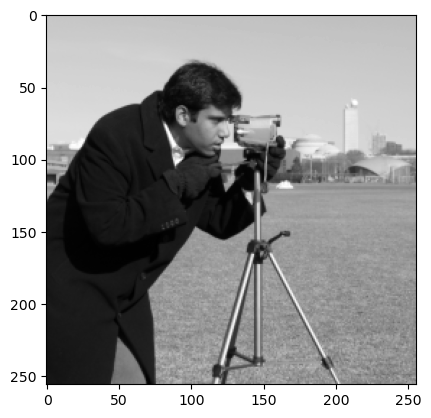

(256, 256) 0.008465512696419247 0.9994933599059728


In [42]:
# Resize the camera image to 256 x 256
from skimage.transform import resize
camera_image_resize = resize(camera_image, (256, 256))
plt.imshow(camera_image_resize, cmap='gray')
plt.show()
print(camera_image_resize.shape, camera_image_resize.min(), camera_image_resize.max()) 

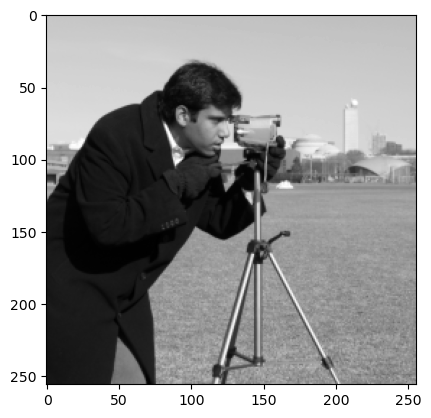

(256, 256) 0.008465512696419247 0.9994933599059728


In [47]:
# Rescale the camera image by a factor of 0.5
from skimage.transform import rescale
camera_image_rescale = rescale(camera_image, 0.5)
plt.imshow(camera_image_rescale, cmap='gray')
plt.show()
print(camera_image_rescale.shape, camera_image_rescale.min(), camera_image_rescale.max())

**Exercise #05:**

* What is the difference between the **resize** and **rescale** functions?


**Solution**


Write here your solution


#Resize
Resize se refiere a cambiar el tamaño general de la imagen (alto y ancho), modificando la cantidad de píxeles de la imagen. Puede reducir o ampliar la imagen manteniendo o alterando la relación de aspecto.

#Rescale
Rescale es cambiar el rango de los valores de intensidad de los píxeles, sin necesariamente modificar las dimensiones físicas de la imagen (ancho y alto).

**Exercise #06:**

* Resize the image by a factor of 0.5 with the `preserve_range` parameter enabled and observe the difference.


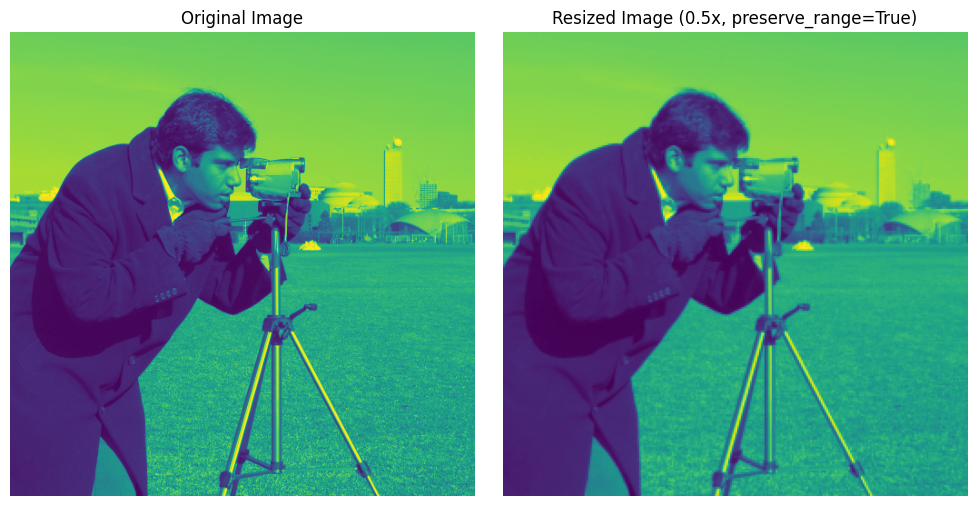

In [19]:
# solution
from skimage.transform import resize
camera_image_resize = resize(camera_image, (camera_image.shape[0] // 2, camera_image.shape[1] // 2), preserve_range=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(camera_image)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(camera_image_resize.astype('uint8'))
ax[1].set_title("Resized Image (0.5x, preserve_range=True)")
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Manipulating Pixel Intensity Values

What happens when we change the pixel values of the image?

Run the following outputs and observe the difference.


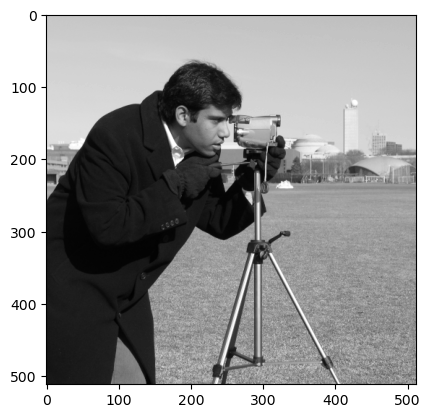

(512, 512) 0 255


In [49]:
plt.imshow(camera_image, cmap='gray')
plt.show()
print(camera_image.shape, camera_image.min(), camera_image.max()) 

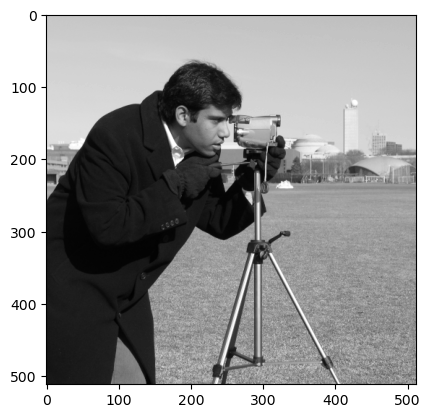

(512, 512) 0.0 127.5


In [50]:
camera_image_2 = camera_image/2  # reducing the intensity by 2
plt.imshow(camera_image_2, cmap='gray')
plt.show()
print(camera_image_2.shape, camera_image_2.min(), camera_image_2.max()) 

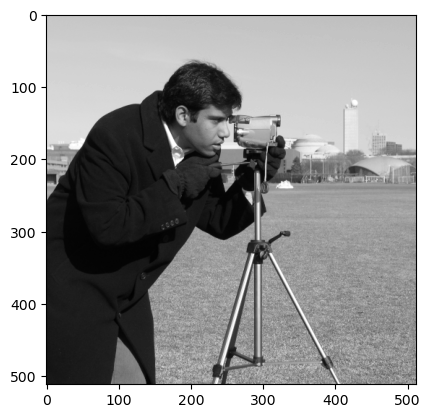

(512, 512) 0.0 63.75


In [64]:
camera_image_3 = camera_image/4  # reducing the intensity by 4
plt.imshow(camera_image_3, cmap='gray')
plt.show()
print(camera_image_3.shape, camera_image_3.min(), camera_image_3.max()) 

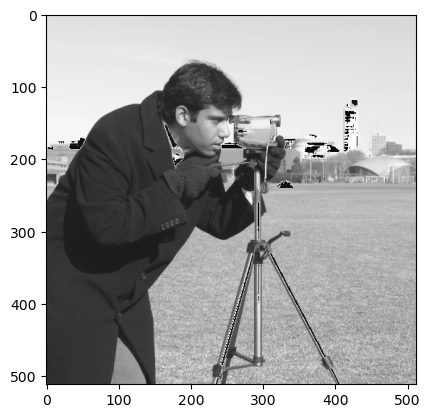

(512, 512) 0 255


In [52]:
camera_image_4 = camera_image + 25  # shifting intensity by +25
plt.imshow(camera_image_4, cmap='gray')
plt.show()
print(camera_image_4.shape, camera_image_4.min(), camera_image_4.max()) 

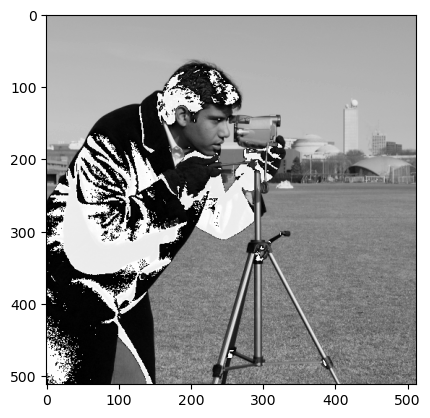

(512, 512) 0 255


In [53]:
camera_image_5 = camera_image - 25  # shifting intensity by -25
plt.imshow(camera_image_5, cmap='gray')
plt.show()
print(camera_image_5.shape, camera_image_5.min(), camera_image_5.max())

**Exercise #07:**

* What differences do you observe with the four previous operations? How does changing intensity affect the image?




**Solution**

Your solution here:




Los primeros dos operaciones consisten en dividir los valores de brillo por dos y por cuatro, respectivamente, pero no se observa un cambio muy grande. Sin embargo, en las dos últimas imágenes, que se sometieron a operaciones de suma y resta, el cambio es muy evidente.

El principio detrás de esto es que la operación de división escala el valor de cada píxel; por ejemplo, dividir entre 2 reduce a la mitad el valor de intensidad de cada píxel, y dividir entre 4 lo reduce a una cuarta parte. Sin embargo, este cambio es gradual.

Por otro lado, cuando se suman o restan valores a la imagen, se añade un valor fijo a todos los píxeles. Este tipo de operación desplaza los valores de todos los píxeles, lo que hace que el cambio sea más fácil de percibir en comparación con la escala proporcional.

**Exercise #08:**

* Resize the `camera_man` image to (64, 64)
* Display the resized image with Matplotlib (at the same scale as the original image)
* Display the resized image with Matplotlib (view the image as 256 x 256)
* What do you observe between the two plots?



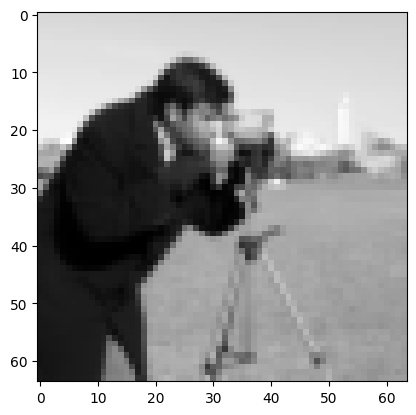

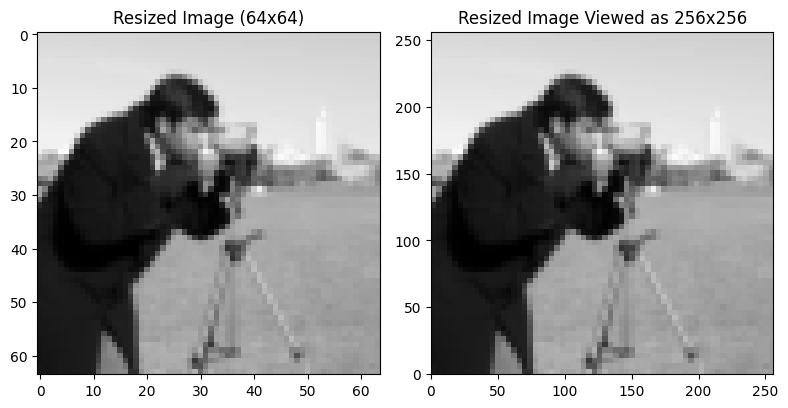

In [29]:
# solution

# Resize the `camera_man` image to (64, 64)
camera_image_resize = resize(camera_image, (64, 64))
plt.imshow(camera_image_resize, cmap='gray')
plt.show()


fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# (64x64）
ax[0].imshow(camera_image_resize, cmap='gray')
ax[0].set_title('Resized Image (64x64)')


# (256x256）
ax[1].imshow(camera_image_resize, cmap='gray', extent=(0, 256, 0, 256))
ax[1].set_title('Resized Image Viewed as 256x256')

plt.tight_layout()
plt.show()


#  What do you observe between the two plots? 

##  Después de ajustar la imagen, la versión de 64x64 se ve más compacta y borrosa. Luego, al ampliar la imagen de 64x64 a 256x256, como se está agrandando una imagen con pocos píxeles, se vuelve aún más borrosa y pixelada.




# Color Space Conversions

One of the common tasks in any image processing problem is converting images from one color space to another; the most common being converting color images to grayscale or removing the alpha channel from the image.

*All color space functions are available in the `skimage.color` package.*


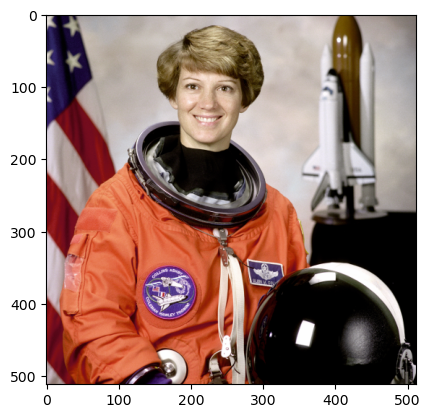

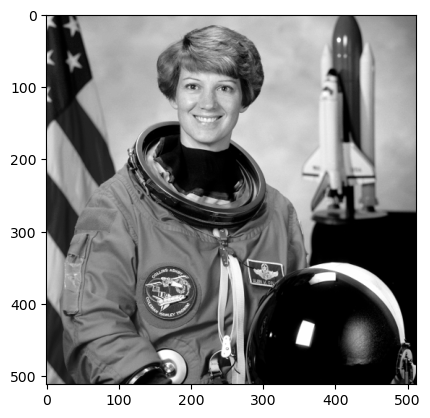

(512, 512)

In [54]:
# converting a rgb image to gray scale

from skimage.color import rgb2gray

img = data.astronaut()
plt.imshow(img)
plt.show()

img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap='gray')
plt.show()
img_gray.shape

(500, 500, 4)


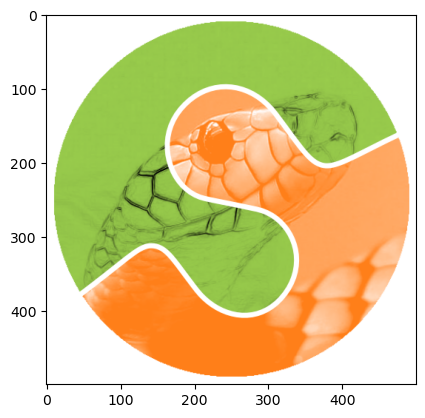

(500, 500, 3)


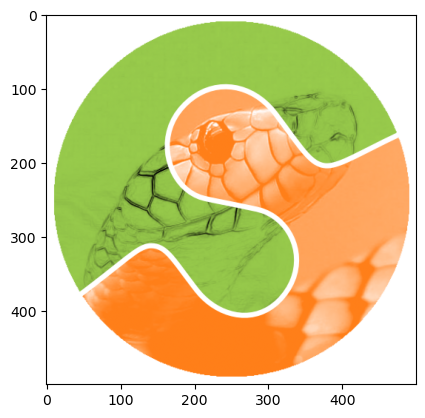

In [55]:
# converting rgba to rgb

from skimage.color import rgba2rgb
# RGBA has 24 bits for RGB color, bit there is an additional 8 bit value for transparency.

img_rgba = data.logo()
print(img_rgba.shape)
plt.imshow(img_rgba)
plt.show()

img_rgb = rgba2rgb(img_rgba)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

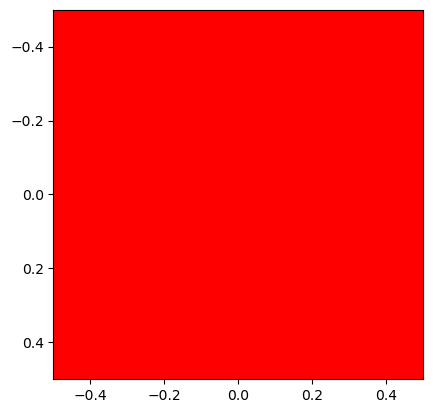

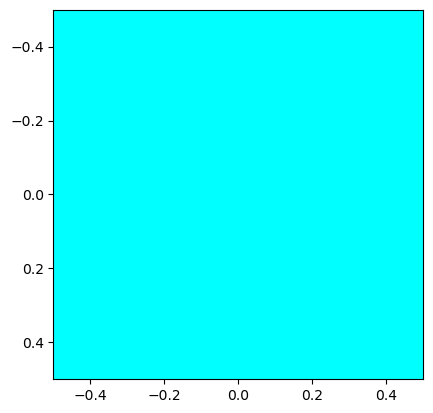

In [56]:
# converting rgb to hsv

from skimage.color import rgb2hsv

# create an array with bright saturated red
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
plt.imshow(red_pixel_rgb)
plt.show()

hsv = rgb2hsv(red_pixel_rgb)
plt.imshow(hsv)
plt.show()

# Conclusion

We hope that through these exercises, you have gained a foundational understanding of image manipulation and processing using Python. From loading and visualizing images to transforming and manipulating pixel values, this notebook introduced you to key tools and techniques for working with images.

This knowledge forms one of the core foundations for implementing AI models that use images in video games. Understanding how to manipulate and process images is essential for tasks like object recognition, image classification, and generating game environments using AI. As you progress, you'll find that these techniques are critical for building more complex AI-driven systems that enhance player experiences in the world of video games.

This is just the beginning—there are many more advanced methods waiting to be explored as you delve deeper into AI and image processing for games.
